# Star Category Classification

### Data Wrangling

In [269]:
#Loading the libraries
import pandas as pd 
import numpy as np

In [271]:
#Importing the dataset 
df=pd.read_csv("star_dataset.csv")
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


- **Temperature** (K): The measure of the thermal energy at the surface of the star.

- **Luminosity** (L/Lo): The total energy output of the star per second (power), compared to the Sun.

- **Radius** (R/Ro): The distance from the center of the star to its surface, relative to the Sun.

- **Absolute Magnitude** (Mv): A logarithmic measure of the star’s true brightness, independent of distance.

- **Star Type**: The classification is based on the star’s nuclear fusion process and life stage.

- **Star Category**: A grouping of stars by size, mass, and energy output characteristics.

- **Star Color**: The wavelength of light emitted by the star, related to its temperature

- **Spectral Class**: A classification of stars by temperature and absorption lines in the star’s spectrum.

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [275]:
#Counting the types of the stars
df['Star type'].value_counts()

Star type
0    40
1    40
2    40
3    40
4    40
5    40
Name: count, dtype: int64

In [276]:
# Changing classification names 
df['Star category'] = df['Star type'].apply(lambda x:'Brown Dwarf' if x == 0 
                                                else 'Red Dwarf' if x == 1
                                                else 'White Darwf' if x == 2
                                                else 'Main Sequence' if x == 3
                                                else 'Supergiant' if x == 4
                                                else 'Hypergiant')
df 

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,Star category
0,3068,0.002400,0.1700,16.12,0,Red,M,Brown Dwarf
1,3042,0.000500,0.1542,16.60,0,Red,M,Brown Dwarf
2,2600,0.000300,0.1020,18.70,0,Red,M,Brown Dwarf
3,2800,0.000200,0.1600,16.65,0,Red,M,Brown Dwarf
4,1939,0.000138,0.1030,20.06,0,Red,M,Brown Dwarf
...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O,Hypergiant
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O,Hypergiant
237,8829,537493.000000,1423.0000,-10.73,5,White,A,Hypergiant
238,9235,404940.000000,1112.0000,-11.23,5,White,A,Hypergiant


### Data Visualization 

In [278]:
import seaborn as sns
import matplotlib.pyplot as plt

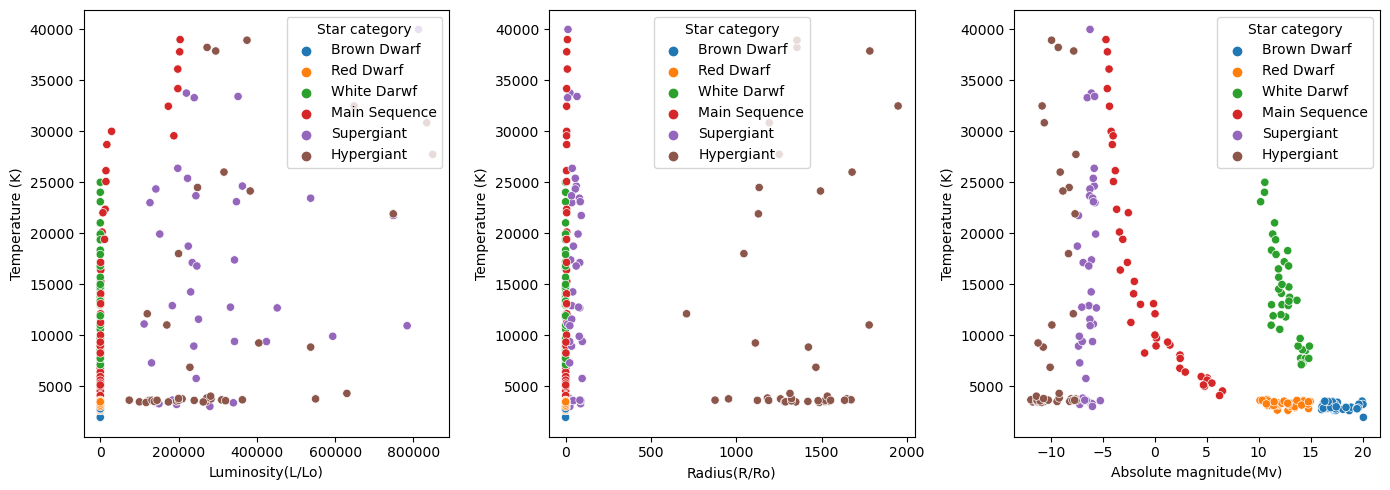

In [279]:
fig, axs = plt.subplots(1,3,figsize = (14,5))
sns.scatterplot(data = df, x = 'Luminosity(L/Lo)', y = 'Temperature (K)', 
               hue = 'Star category', ax = axs[0])
sns.scatterplot(data = df, x ='Radius(R/Ro)', y = 'Temperature (K)',
               hue = 'Star category', ax = axs[1] )
sns.scatterplot(data = df, x = 'Absolute magnitude(Mv)', y = 'Temperature (K)',
               hue = 'Star category', ax = axs[2] )

plt.tight_layout()
plt.show()


**Temperature (K) vs Luminosity (L/Lo)  (Upper plot)**

1. Brown Dwarfs and Red Dwarfs (blue dots and orange dots) usually have low Luminosity as well as low Temperature.
2. White Dwarfs (green dots) usually follow a certain pattern where when there is a slight increase in Luminosity the Temperature increases. They have lower Luminosity but higher temperatures.
3. Main Sequence stars (red dots) mostly follow a clear pattern, where higher temperatures correspond to higher luminosities.
4. Supergiants (purple) and Hypergiants (brown) are generally more luminous but show a wider spread in temperature. 

**Temperature vs Radius (R/Ro)  (Middle Plot)**

1. Red and Brown Dwarfs have low temperatures and the smallest radii of the star classification, clustering towards the bottom left.
2. White Dwarfs show small radii despite the high temperatures that they show. They are a kind of compact object.
3. Main Sequence stars again follow a pattern of increasing radius with increasing temperature.
4. Supergiants and Hypergiants have much larger radii but are spread across a wide temperature range.

**Temperature (K) vs Absolute Magnitude (Lower Plot)**

1. Main Sequence stars are well-distributed with a strong negative correlation: stars with higher temperatures tend to have lower (brighter) magnitudes.
2. Supergiants and Hypergiants have very bright magnitudes and a wide range of temperatures.
3. White Dwarfs have relatively high absolute magnitudes (dim) despite their high temperatures.
4. Red and Brown Dwarfs cluster at the bottom right, having low temperatures and high (dim) absolute magnitudes.*

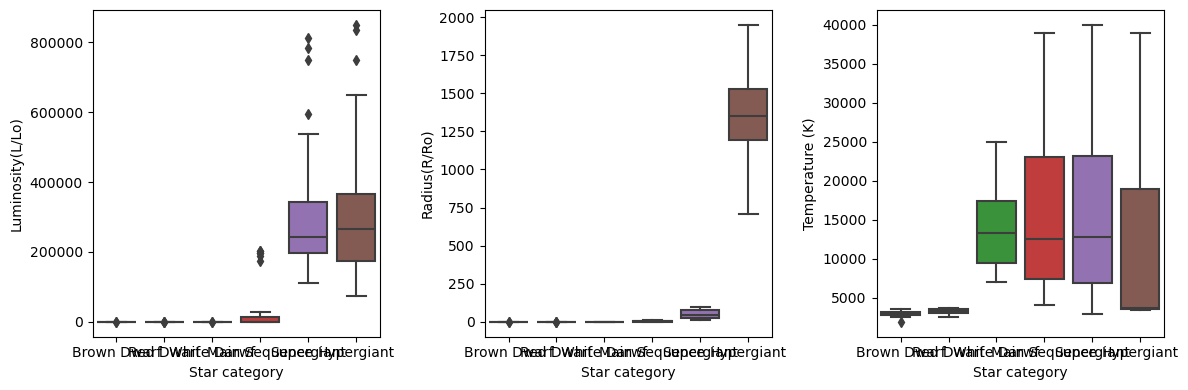

In [283]:
# Making some boxplot for Star Category
fig, axs = plt.subplots(1,3, figsize = (12,4))
sns.boxplot(data = df, x = 'Star category', y = 'Luminosity(L/Lo)', ax = axs[0])
sns.boxplot(data = df, x = 'Star category', y = 'Radius(R/Ro)', ax = axs[1])
sns.boxplot(data = df, x = 'Star category', y = 'Temperature (K)', ax = axs[2])

plt.tight_layout()
plt.show()


**Luminosity (L/Lo) vs Star Category (Upper Plot)**

1. Brown Dwarfs, Red Dwarfs, and White Dwarfs: These stars have very low luminosity, with minimal variation. Overall they are clustered near zero.
2. Main Sequence stars: Show a moderate increase in luminosity, but still much lower than Supergiants and Hypergiants. The variation is much larger compared to dwarfs.
3. Supergiants and Hypergiants: Have significantly higher luminosity values, with some extreme outliers reaching even greater luminosities. Hypergiants in particular show a very wide range in luminosity.

**Radius (R/Ro) vs Star Category (Middle Plot)**

1. Brown Dwarfs, Red Dwarfs, White Dwarfs: All show very small radii, clustering near the bottom, similar to their small luminosity.
2. Main Sequence stars: Show a slight increase in radius, but remain significantly smaller than Supergiants and Hypergiants.
3. Supergiants and especially Hypergiants: Have enormous radii, with Hypergiants showing much more spread, indicating that Hypergiants can vary widely in size.

**Temperature (K) vs Star Category (Lower Plot)**

1. Brown Dwarfs, Red Dwarfs: These stars have low temperatures. The temperature spread is relatively narrow.
2. White Darws: Despite of their sizes, these have a large temperatures and a lot of variety of temperatures
3. Main Sequence stars: Show a broader range of temperatures, with some stars reaching very high temperatures compared to dwarfs.
4. Supergiants and Hypergiants: These stars exhibit a wide temperature range, with Supergiants generally showing more variability. Some can be as hot as Main Sequence stars, while others are much cooler.

### Some insights 

**The above scatter and box plots provide us with these General Insights**

- Dwarf stars (Brown, Red, and White) tend to have low luminosity, small radii, and low-to-moderate temperatures.
- Main Sequence stars are more moderate in all characteristics, but show clear patterns of increasing luminosity, radius, and temperature compared to dwarfs.
- Supergiants and Hypergiants are the largest and brightest stars, with significant variation in size and temperature. They have a much higher spread in luminosity, massive radii, and varying temperatures.

#### Continuing with the visualization

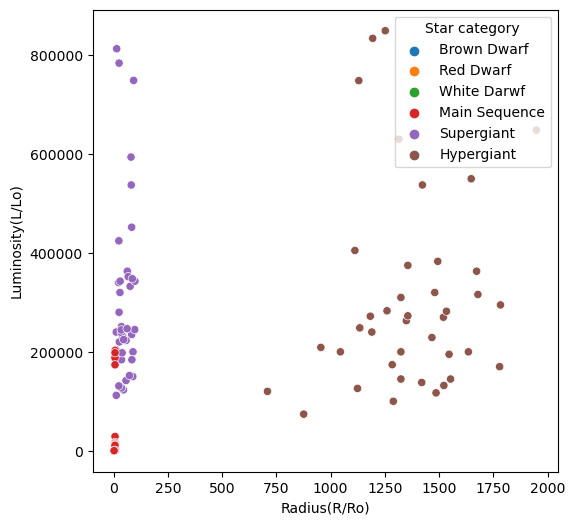

In [291]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = df, x = 'Radius(R/Ro)', y = 'Luminosity(L/Lo)',
               hue = 'Star category')
plt.show()

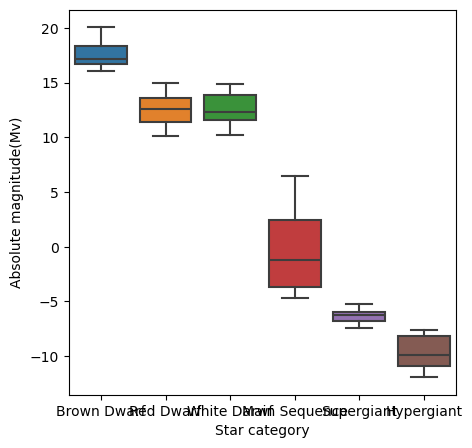

In [292]:
plt.figure(figsize = (5,5))
sns.boxplot(data = df, x = 'Star category', y = 'Absolute magnitude(Mv)')
plt.show()

In [293]:
# Let's create another column 
df.insert(0, 'M/Mo', df['Luminosity(L/Lo)']**(1/3.5))
df = df.rename(columns = {'M/Mo': 'Mass M/Mo'})
df

,Mass M/Mo,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,Star category
0,0.178439,3068,0.002400,0.1700,16.12,0,Red,M,Brown Dwarf
1,0.113985,3042,0.000500,0.1542,16.60,0,Red,M,Brown Dwarf
2,0.098506,2600,0.000300,0.1020,18.70,0,Red,M,Brown Dwarf
3,0.087731,2800,0.000200,0.1600,16.65,0,Red,M,Brown Dwarf
4,0.078906,1939,0.000138,0.1030,20.06,0,Red,M,Brown Dwarf
...,...,...,...,...,...,...,...,...,...
235,39.131284,38940,374830.000000,1356.0000,-9.93,5,Blue,O,Hypergiant
236,49.177673,30839,834042.000000,1194.0000,-10.63,5,Blue,O,Hypergiant
237,43.375987,8829,537493.000000,1423.0000,-10.73,5,White,A,Hypergiant
238,40.004756,9235,404940.000000,1112.0000,-11.23,5,White,A,Hypergiant


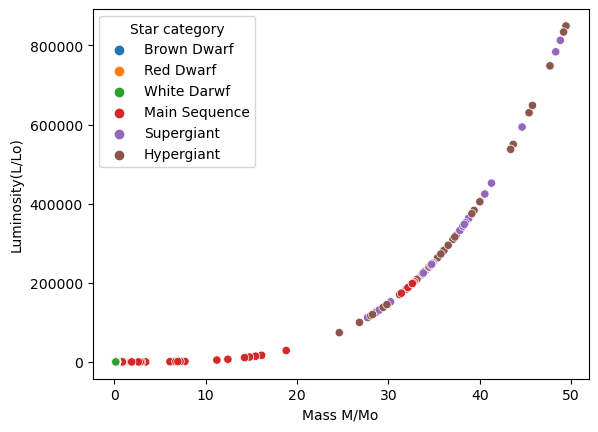

In [294]:
sns.scatterplot(data = df, x = 'Mass M/Mo', y = 'Luminosity(L/Lo)'
               , hue = 'Star category')
plt.show()

**The above plot describing the relationship between Mass (derived from Luminosity) and Luminosity tell us the follwing things:**

- The plot demonstrates that stars with larger masses emit significantly more energy, with hypergiants and supergiants showing the highest values for both mass and luminosity.
- Brown dwarfs, red dwarfs, and white dwarfs are far less luminous and less massive, clustered towards the bottom left.
- This increase in luminosity with mass is a characteristic of stellar evolution, where massive stars burn their fuel more rapidly and shine more brightly.

### Data Preprocessing and Feature Engineering

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Mass M/Mo               240 non-null    float64
 1   Temperature (K)         240 non-null    int64  
 2   Luminosity(L/Lo)        240 non-null    float64
 3   Radius(R/Ro)            240 non-null    float64
 4   Absolute magnitude(Mv)  240 non-null    float64
 5   Star type               240 non-null    int64  
 6   Star color              240 non-null    object 
 7   Spectral Class          240 non-null    object 
 8   Star category           240 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 17.0+ KB


In [298]:
for col in df.columns[df.dtypes == 'object']:
    print(df[col].value_counts(), '\n\n')

Star color
Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: count, dtype: int64 


Spectral Class
M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: count, dtype: int64 


Star category
Brown Dwarf      40
Red Dwarf        40
White Darwf      40
Main Sequence    40
Supergiant       40
Hypergiant       40
Name: count, dtype: int64 




In [300]:
from sklearn.preprocessing import LabelEncoder

In [302]:
#Check this link for documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder

le = LabelEncoder()
for col in df.columns[df.dtypes == 'object']:
    #Changing the values with labels
    df[col] = le.fit_transform(df[col])
df.head()

,Mass M/Mo,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,Star category
0,0.178439,3068,0.002400,0.1700,16.12,0,10,5,0
1,0.113985,3042,0.000500,0.1542,16.60,0,10,5,0
2,0.098506,2600,0.000300,0.1020,18.70,0,10,5,0
3,0.087731,2800,0.000200,0.1600,16.65,0,10,5,0
4,0.078906,1939,0.000138,0.1030,20.06,0,10,5,0


In [304]:
from sklearn.feature_selection import mutual_info_classif

In [305]:
#Create a dataset without the category
t_x = df.drop(columns = 'Star category')
#Separate the objective
t_y = df['Star category']

#Use the model
mi = mutual_info_classif(t_x, t_y)
print(mi)

[1.09822523 0.63822867 1.0649071  1.72840399 1.57700942 1.80222677
 0.78468529 0.6703728 ]


In [306]:
mi_scores_df = pd.DataFrame({'Feature': t_x.columns, 'MI Score':mi})
mi_scores_df = mi_scores_df.sort_values(by = 'MI Score', ascending = False).reset_index()
mi_scores_df = mi_scores_df.drop(columns = 'index')
print(mi_scores_df)

                  Feature  MI Score
0               Star type  1.802227
1            Radius(R/Ro)  1.728404
2  Absolute magnitude(Mv)  1.577009
3               Mass M/Mo  1.098225
4        Luminosity(L/Lo)  1.064907
5              Star color  0.784685
6          Spectral Class  0.670373
7         Temperature (K)  0.638229


We can see the order of influence from the columns to the category of the stars.

In [308]:
# Adding a new column
df.insert(5, 'Magnitud_Temperature_Ratio', df['Absolute magnitude(Mv)']/df['Temperature (K)'])
df.head()

,Mass M/Mo,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Magnitud_Temperature_Ratio,Star type,Star color,Spectral Class,Star category
0,0.178439,3068,0.002400,0.1700,16.12,0.005254,0,10,5,0
1,0.113985,3042,0.000500,0.1542,16.60,0.005457,0,10,5,0
2,0.098506,2600,0.000300,0.1020,18.70,0.007192,0,10,5,0
3,0.087731,2800,0.000200,0.1600,16.65,0.005946,0,10,5,0
4,0.078906,1939,0.000138,0.1030,20.06,0.010346,0,10,5,0


In [309]:
df.rename(columns = {'Magnitud_Temperature_Ratio': 'Magnitude_Temperature_Ratio'})
mi = mutual_info_classif(df[['Magnitud_Temperature_Ratio']], t_y)
mi_scores_df = pd.DataFrame({'Feature':['Magnitude_Temperature_Ratio'], 
                             'MI Score' : mi})
print(mi_scores_df)

                       Feature  MI Score
0  Magnitude_Temperature_Ratio  1.485496


In [311]:
df.insert(6, 'Radius_Luminosity_Ratio', df['Radius(R/Ro)']/df['Luminosity(L/Lo)'])
df.head()

,Mass M/Mo,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Magnitud_Temperature_Ratio,Radius_Luminosity_Ratio,Star type,Star color,Spectral Class,Star category
0,0.178439,3068,0.002400,0.1700,16.12,0.005254,70.833333,0,10,5,0
1,0.113985,3042,0.000500,0.1542,16.60,0.005457,308.400000,0,10,5,0
2,0.098506,2600,0.000300,0.1020,18.70,0.007192,340.000000,0,10,5,0
3,0.087731,2800,0.000200,0.1600,16.65,0.005946,800.000000,0,10,5,0
4,0.078906,1939,0.000138,0.1030,20.06,0.010346,746.376812,0,10,5,0


In [312]:
#Create a dataset without the category
t_x = df.drop(columns = 'Star category')
#Separate the objective
t_y = df['Star category']
#Use the model
mi = mutual_info_classif(t_x, t_y)
mi_scores_df = pd.DataFrame({'Feature': t_x.columns, 'MI Score':mi})
mi_scores_df = mi_scores_df.sort_values(by = 'MI Score', ascending = False).reset_index()
print(mi_scores_df)

   index                     Feature  MI Score
0      7                   Star type  1.802227
1      3                Radius(R/Ro)  1.729550
2      4      Absolute magnitude(Mv)  1.575812
3      5  Magnitud_Temperature_Ratio  1.485496
4      6     Radius_Luminosity_Ratio  1.139594
5      0                   Mass M/Mo  1.100593
6      2            Luminosity(L/Lo)  1.066774
7      8                  Star color  0.796519
8      9              Spectral Class  0.711318
9      1             Temperature (K)  0.635254


So, with this information we can conclude that radios are important factors in the clasification of stars. 

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Mass M/Mo                   240 non-null    float64
 1   Temperature (K)             240 non-null    int64  
 2   Luminosity(L/Lo)            240 non-null    float64
 3   Radius(R/Ro)                240 non-null    float64
 4   Absolute magnitude(Mv)      240 non-null    float64
 5   Magnitud_Temperature_Ratio  240 non-null    float64
 6   Radius_Luminosity_Ratio     240 non-null    float64
 7   Star type                   240 non-null    int64  
 8   Star color                  240 non-null    int64  
 9   Spectral Class              240 non-null    int64  
 10  Star category               240 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 20.8 KB


### Data Preparation

In [316]:
from sklearn.model_selection import train_test_split

In [317]:
#Let's create a set for training the model 
x = df.drop(columns = 'Star category')
y = df['Star category']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state = 42)

In [319]:
#Importing libraries of machine learning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score, recall_score

### AdoBoost Classifier

In [321]:
ada = AdaBoostClassifier(algorithm='SAMME')
ada_x_train = x_train.copy()
ada_x_test = x_test.copy()
ada_y_train = y_train.copy()
ada_y_test = y_test.copy()

param = {'estimator': [DecisionTreeClassifier(max_depth = 1), None], 
        'learning_rate': np.arange(0.1,4.1,0.01),
        'n_estimators': [300]}
nada = RandomizedSearchCV(ada, param_distributions= param, cv = 10,
                         n_jobs = -1, random_state = 42, scoring = 'accuracy')
nada.fit(ada_x_train, ada_y_train)

print(nada.best_params_)
print(nada.best_score_)

{'n_estimators': 300, 'learning_rate': 3.0599999999999987, 'estimator': None}
0.9555555555555555


In [322]:
nada = nada.best_estimator_
prediction1_train = nada.predict(ada_x_train)
prediction1 = nada.predict(ada_x_test)

### Decision Tree Classifier

In [324]:
dt_x_train = x_train.copy()
dt_x_test = x_test.copy()
dt_y_train = y_train.copy()
dt_y_test = y_test.copy()

dt = DecisionTreeClassifier()
path = dt.cost_complexity_pruning_path(dt_x_train, dt_y_train)
alphas = path.ccp_alphas
param = {'ccp_alpha':alphas}
ndt = GridSearchCV(dt, param_grid=param, n_jobs = -1, scoring = 'accuracy')
ndt.fit(dt_x_train, dt_y_train)

print(ndt.best_params_)
print(ndt.best_score_)
ba = ndt.best_params_['ccp_alpha']

{'ccp_alpha': 0.0}
0.9888888888888889


In [325]:
dt = DecisionTreeClassifier(ccp_alpha=ba)
param = {'criterion':['gini', 'entropy'], 
        'min_samples_split': list(np.arange(2,51)),
        'min_samples_leaf': list(np.arange(1,51)),
        'max_features': ['sqrt', 'log2', None]}
ndt = RandomizedSearchCV(dt, param_distributions=param, cv = 10,
                        n_jobs = -1, random_state = 42, scoring = 'accuracy')
ndt.fit(dt_x_train, dt_y_train)
print(ndt.best_params_)
print(ndt.best_score_)
ndt = ndt.best_estimator_

{'min_samples_split': 29, 'min_samples_leaf': 18, 'max_features': 'sqrt', 'criterion': 'gini'}
0.9833333333333334


In [326]:
prediction2_train = ndt.predict(dt_x_train)
prediction2 = ndt.predict(dt_x_test)

### Random Forest Classifier

In [328]:
rf_x_train = x_train.copy()
rf_x_test = x_test.copy()
rf_y_train = y_train.copy()
rf_y_test = y_test.copy()
rf = RandomForestClassifier()

param = {'criterion': ['gini', 'entropy'],
        'min_samples_split': list(np.arange(2,52)),
        'min_samples_leaf': list(np.arange(1,52)),
        'n_estimators':[400]}

nrf = RandomizedSearchCV(rf, param_distributions=param, n_jobs = -1,
                        random_state = 42, cv = 10)
nrf.fit(rf_x_train, rf_y_train)
print(nrf.best_params_)
print(nrf.best_score_)

{'n_estimators': 400, 'min_samples_split': 44, 'min_samples_leaf': 11, 'criterion': 'entropy'}
1.0


In [329]:
nrf = nrf.best_estimator_
prediction3_train = nrf.predict(rf_x_train)
prediction3 = nrf.predict(rf_x_test)

### Evaluation of metrics

In [331]:
training_df = pd.DataFrame({'Classification Algorithms':['AdaBoost', 
                                                         'Decision Tree', 'Random Forest'],
                           'Training Accuracy': [
                               accuracy_score(ada_y_train, prediction1_train),
                               accuracy_score(dt_y_train, prediction2_train),
                               accuracy_score(rf_y_train, prediction3_train)
                           ],
                           'Training Precision': [
                               precision_score(ada_y_train, prediction1_train, average='weighted', zero_division=0),
                               precision_score(dt_y_train, prediction2_train, average='weighted', zero_division=0),
                               precision_score(rf_y_train, prediction3_train, average='weighted', zero_division=0)
                           ],
                           'Training Recall':[
                               recall_score(ada_y_train, prediction1_train, average = 'weighted'),
                               recall_score(dt_y_train, prediction2_train, average = 'weighted'),
                               recall_score(rf_y_train, prediction3_train, average = 'weighted')
                           ],
                            'Training F1 Score':[
                                f1_score(ada_y_train, prediction1_train, average = 'weighted'),
                                f1_score(dt_y_train, prediction2_train, average = 'weighted'),
                                f1_score(rf_y_train, prediction3_train, average = 'weighted')
                            ]
                           })

training_df

,Classification Algorithms,Training Accuracy,Training Precision,Training Recall,Training F1 Score
0,AdaBoost,1.000000,1.000000,1.000000,1.000000
1,Decision Tree,0.922222,0.938189,0.922222,0.918952
2,Random Forest,1.000000,1.000000,1.000000,1.000000


In [332]:
test_df = pd.DataFrame({'Classification Algorithms':['AdaBoost', 
                                                         'Decision Tree', 'Random Forest'],
                           'Training Accuracy': [
                               accuracy_score(ada_y_test, prediction1),
                               accuracy_score(dt_y_test, prediction2),
                               accuracy_score(rf_y_test, prediction3)
                           ],
                           'Training Precision': [
                               precision_score(ada_y_test, prediction1, average='weighted', zero_division=0),
                               precision_score(dt_y_test, prediction2, average='weighted', zero_division=0),
                               precision_score(rf_y_test, prediction3, average='weighted', zero_division=0)
                           ],
                           'Training Recall':[
                               recall_score(ada_y_test, prediction1, average = 'weighted'),
                               recall_score(dt_y_test, prediction2, average = 'weighted'),
                               recall_score(rf_y_test, prediction3, average = 'weighted')
                           ],
                            'Training F1 Score':[
                                f1_score(ada_y_test, prediction1, average = 'weighted'),
                                f1_score(dt_y_test, prediction2, average = 'weighted'),
                                f1_score(rf_y_test, prediction3, average = 'weighted')
                            ]
                           })
test_df


,Classification Algorithms,Training Accuracy,Training Precision,Training Recall,Training F1 Score
0,AdaBoost,1.000000,1.000,1.000000,1.000000
1,Decision Tree,0.933333,0.945,0.933333,0.927026
2,Random Forest,1.000000,1.000,1.000000,1.000000


In [333]:
print('AdaBoost Report \n', classification_report(ada_y_test, prediction1, zero_division=0), '-----------------------')
print('Decision Tree Report \n', classification_report(dt_y_test, prediction2,zero_division=0), '-----------------------')
print('Random Forest Report \n', classification_report(rf_y_test, prediction3, zero_division=0))

AdaBoost Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         9

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60
 -----------------------
Decision Tree Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.80      1.00      0.89        12
           2       1.00      0.56      0.71         9
           3       1.00      1.00      1.00        11
           4       0.90      1.00      0.95         9
           5       1.00      1.00      1.00         9

    accuracy

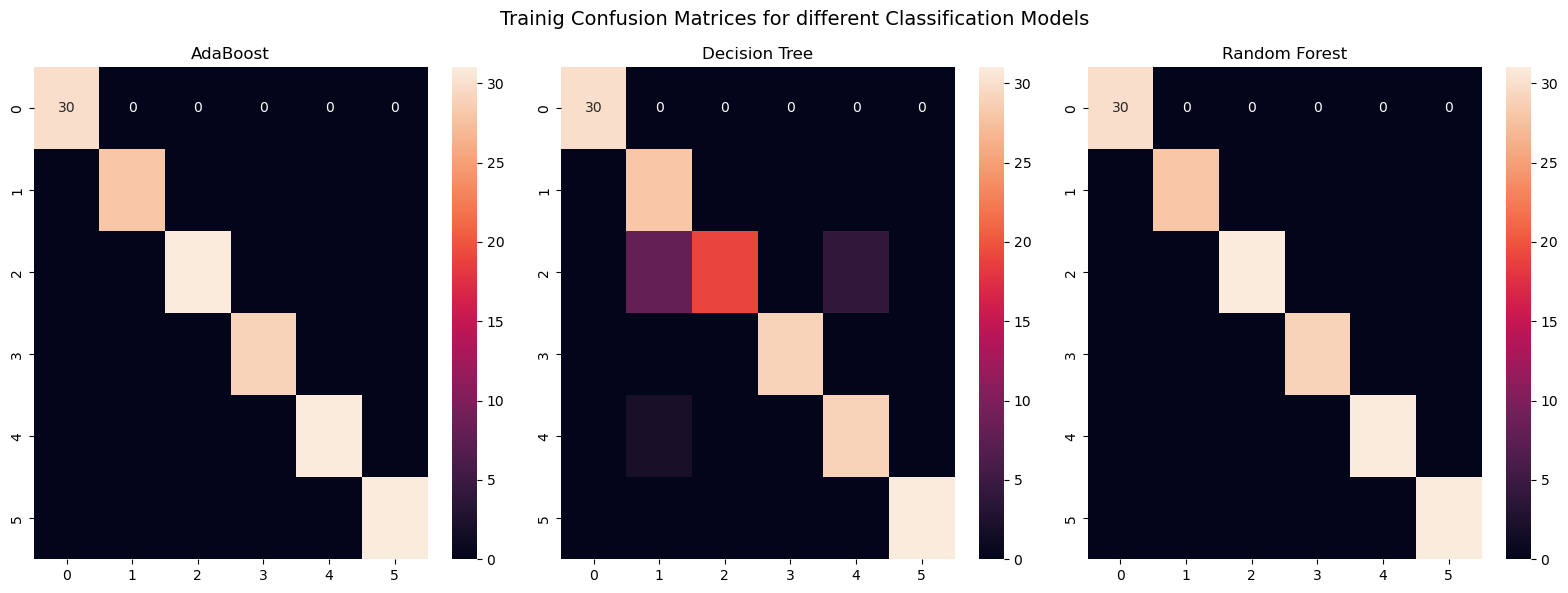

In [334]:
fig, axs = plt.subplots(1, 3, figsize = (16,6))
fig.suptitle('Trainig Confusion Matrices for different Classification Models', fontsize = 14)
sns.heatmap(confusion_matrix(ada_y_train, prediction1_train), annot = True, ax = axs[0])
axs[0].set_title('AdaBoost')
sns.heatmap(confusion_matrix(dt_y_train, prediction2_train), annot = True, ax = axs[1])
axs[1].set_title('Decision Tree')
sns.heatmap(confusion_matrix(rf_y_train, prediction3_train), annot = True, ax = axs[2])
axs[2].set_title('Random Forest')

plt.tight_layout()
plt.show()

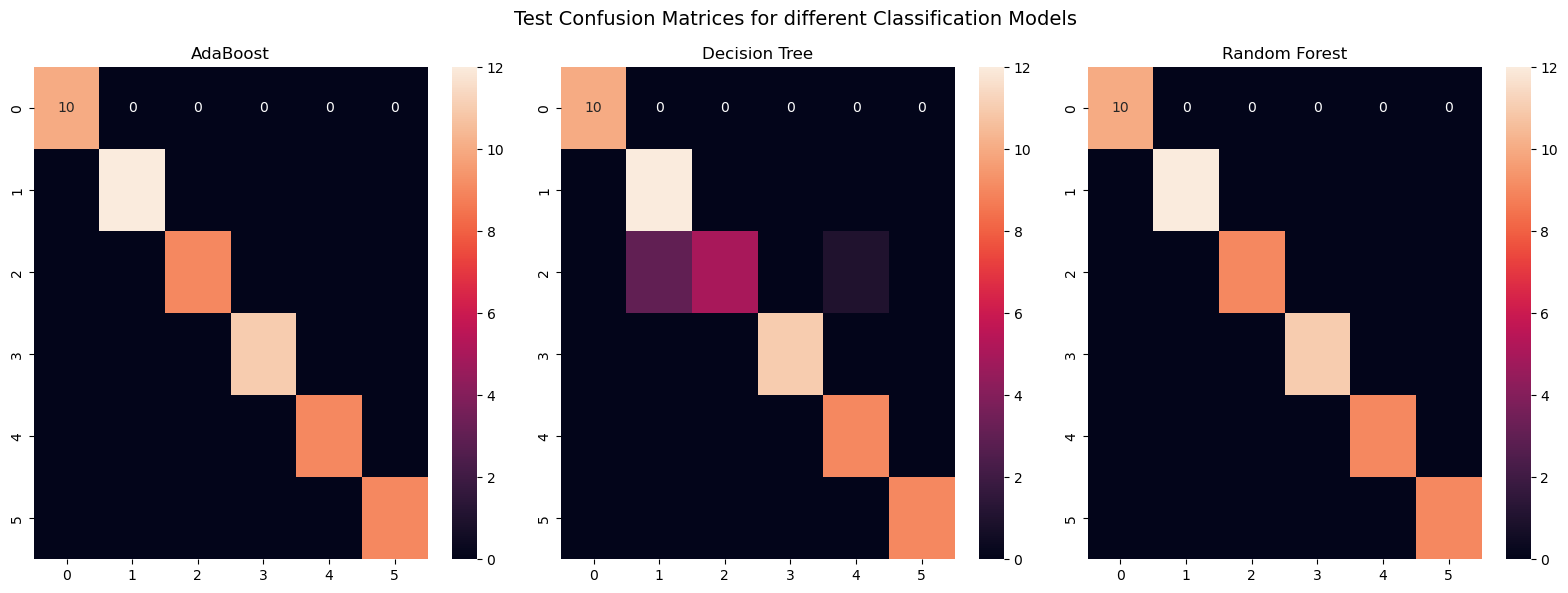

In [338]:
fig, axs = plt.subplots(1, 3, figsize = (16,6))
fig.suptitle('Test Confusion Matrices for different Classification Models', fontsize = 14)
sns.heatmap(confusion_matrix(ada_y_test, prediction1), annot = True, ax = axs[0])
axs[0].set_title('AdaBoost')
sns.heatmap(confusion_matrix(dt_y_test, prediction2), annot = True, ax = axs[1])
axs[1].set_title('Decision Tree')
sns.heatmap(confusion_matrix(rf_y_test, prediction3), annot = True, ax = axs[2])
axs[2].set_title('Random Forest')

plt.tight_layout()
plt.show()

### Conslusions

- The three classification models perform excellently in classifying the stars. This is due to the increase in the range of the parameters, finding a better configuration for this kind of object. 
- It would be a good idea to contrast between different researches and model to validate the work made in this report. 